In [7]:
### Animation for cross correlation (Sine and Cosine)
import numpy as np
import matplotlib.pyplot as plt
t_end=100*np.pi
x_range=np.linspace(0,t_end,10000)

### Generate the waveforms (either with or without noise)
y_sin=np.sin(x_range)+np.random.rand(len(x_range))-.5
y_cos=np.cos(x_range)+np.random.rand(len(x_range))-.5
y_cos2=np.cos(x_range+np.pi/2)




In [11]:
fig11,(ax11,ax12)=plt.subplots(1,2,figsize=(10,4))
# fig12,=plt.subplots()
ax12.set_aspect('equal', 'datalim')
x_range=np.linspace(0,t_end,10000)
import matplotlib.ticker as tck
ax11.xaxis.set_major_formatter(tck.FormatStrFormatter('%g '))
ax11.xaxis.set_major_locator(tck.MultipleLocator(base=6.0))
x_range=x_range/np.pi*12
y = np.array([-1,1])


ax11.plot(x_range,y_sin,linewidth=3,label='Paris',color='Purple')
ax11.plot(x_range,-y_cos2,linestyle='--',linewidth=3,label='Boston \n+6 hours',color='Orange')
ax11.set_xlim([0,4*12])

ax11.set_ylim([-2,2])
my_yticks = ['Dark','Light']

ax11.set_yticks([-1.0,1.0])
ax11.set_yticklabels(my_yticks)
ax11.set_xlabel('Time (Hours)')
ax11.set_ylabel('Normalized Daylight')
ax11.legend()
ax12.scatter(y_sin,-y_cos2,color='brown')
ax12.set_xlabel('Daylight in Paris')
ax12.set_ylabel('Daylight in Boston')
ax12.set_title('Daylight\n Boston shifted +6 hours')

ax12.set_yticks([-1.0,1.0])
ax12.set_yticklabels(my_yticks)
ax12.set_xticks([-1.0,1.0])
ax12.set_xticklabels(my_yticks)

# fig11.tight_layout()
fig11.savefig('graph_1.png',bbox_inches='tight')
# fig12.savefig('graph_2.png')



In [12]:
import statsmodels.api as sm
x_vect=np.linspace(-t_end,t_end,2*len(x_range))
cc_storage1 = np.zeros((len(x_range) * 2, 1))
cc_storage1[len(x_range):, 0] = sm.tsa.stattools.ccf(y_sin, y_cos)
cc_storage1[0:len(x_range), 0] = sm.tsa.stattools.ccf(y_cos, y_sin)[::-1]

In [13]:
from IPython.display import HTML
from matplotlib import animation, rc
import matplotlib.ticker as tck
fig2,(ax2,ax3,ax4) = plt.subplots(1,3,figsize=(10,3))

# ax2.scatter(index_vals,xcor_df[0,:])
# ax2.plot(x_vect,analytic_xcor_XY(x_vect,tau_x,tau_y,0.1),linewidth=3,color='red',label='Analytic Solution')
ax2.set_xlim([0,4])
ax2.set_ylim([-2,2])
x_vect=np.linspace(-t_end,t_end,2*len(x_range))/np.pi
ax2.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax2.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
x_range=np.linspace(0,t_end,10000)
x_range=x_range/np.pi
ax3.set_xlim([-2,2])
ax3.set_ylim([-2,2])
ax4.set_xlim([-2,2])
ax4.set_ylim([-2,2])
ax4.set_title('Cross-Correlation (F*G)')
ax3.set_title('Flattened Data')
ax2.set_title('Time Series')
ax4.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax4.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
# ax3.set_yscale('log')
# ax3.set_ylabel('Error')
# ax2.set_xlabel('Tau')
# ax2.set_ylabel('Correlation')
ax4.plot(x_vect,cc_storage1,color='blue',alpha=0.5,linewidth=3)
lines = [ax2.plot([],[],color='blue',linewidth=3,label='F'),ax2.plot([],[],color='green',linewidth=3,label='G')]
dots=ax3.plot([],[],color='blue',linestyle='none',marker='o',label='Numerical Calculation')
xcor=ax4.plot([],[],color='red',linestyle='none',marker='o')
raw=np.arange(0,200)
a=np.append(raw,raw[::-1])
total=np.append(a,-a)
x_place=x_range[0:500]
z=np.arange(100,-100)
ax2.legend()
ax4.axhline(y=0, color='k')
ax4.axvline(x=0, color='k')
ax2.set_xlabel('Time')
ax3.set_xlabel('F')
ax3.set_ylabel('G')
ax4.set_ylabel('Correlation')
ax4.set_xlabel(r'Time Delay $\tau$')
def init():
#     data=np.hstack((index_vals[:],xcor_df[0,:]))
    dots[0].set_data(y_sin[0:500],y_cos[0:500])
    lines[0][0].set_data(x_place,y_sin[0:500])
    lines[1][0].set_data(x_place,y_cos[0:500])
    xcor[0].set_data(x_vect[:int(len(x_vect)/2)],cc_storage1[:int(len(x_vect)/2)])
def animate(z):
#     data=np.hstack((index_vals[:],xcor_df[i,:]))
    i=total[z]
    dots[0].set_data(y_sin[500+i:1000+i],y_cos[500:1000])
    xcor[0].set_data(x_vect[int(len(x_vect)/2)+i],cc_storage1[int(len(x_vect)/2)+i])


    lines[1][0].set_data(x_place,y_cos[500+i:1000+i])
    ### calculating the accuracy of the simulation
    
    return lines,dots,xcor

    
fig2.tight_layout()
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig2, animate,init_func=init,
                               frames=800, interval=50, blit=False)
HTML(anim.to_html5_video())

In [21]:
Writer = animation.writers['ffmpeg']
writer = Writer( metadata=dict(artist='Me'), fps=20,bitrate=5000)
anim.save('vid_2.mp4', writer=writer)

In [ ]:
raw=np.arange(0,100)
a=np.append(raw,raw[::-1])
total=np.append(a,-a)

In [4]:
def analytic_xcor_XY(t,tx,ty,gy):
    values=np.zeros((len(t),1)).ravel()
    tg0=t[t>0]
    R_AA=np.sqrt(np.pi/2)*(1/(2*tx))
    R_BB = (gy**2*ty**2*np.sqrt(np.pi/2))*((ty-tx)/(2*(ty**2-tx**2)))# maybe no 2x?0.0
    NAB=1/np.sqrt(R_AA*R_BB)
    values[t>0]=.5*gy*ty*np.sqrt(np.pi/2)*np.exp(-tg0/tx)/(tx+ty)
    tl0 = t[t <= 0]
    #normalization factors
    # values[t <= 0]=gy*ty*np.sqrt(np.pi/2)*(2*ty*np.exp(tl0/tx)//(ty**2-tx**2))
    values[t <= 0] =.5*gy*ty*np.sqrt(np.pi/2)*(((2*ty*np.exp(tl0/ty))/(ty**2-tx**2))-(np.exp(tl0/tx))/(ty-tx))
    return values*NAB


In [2]:
def Simplified_simulation(t_int,t_end,N,tau_x,tau_y,tau_z):
    dt = float(t_end - t_int) / N

    ### Initialize Matrix for all possible cells at all time points for all dimension of data (lets say we're not going to let it get more than 100)
    Intrinsic_Noise = np.empty((N, 3))
    Intrinsic_Noise[:,:]= np.NAN

    Gene = np.empty((N, 3))
    Gene[:,:]= np.NAN


    g_y=1
    g_z=1

    lambda_x=(1.0 - np.exp(-dt / tau_x))

    ### initializing values

    cellular_indexes = np.array(range(100))
    # for index in cellular_indexes:
    Gene[0, 0] = 0
    Gene[0, 1] = 0
    Gene[0, 2] = 0

    for t in np.arange(N-1)+1:
        Gene[t,0] = Gene[t - 1,0] + dt * (-Gene[t - 1,0]/tau_x)+np.sqrt(2/tau_x)*np.random.normal(scale=np.sqrt(dt),loc=0.0)
        Gene[t,1] = Gene[t - 1,1] + dt * (g_y*Gene[t - 1,0]-Gene[t - 1,1]/tau_y)+np.sqrt(2/tau_y)*np.random.normal(scale=np.sqrt(dt),loc=0.0)
        Gene[t, 2] = Gene[t - 1,2] + dt * (g_z*Gene[t - 1,0]-Gene[t - 1,2]/tau_z)+np.sqrt(2/tau_z)*np.random.normal(loc=0.0,scale=np.sqrt(dt))
        # Gene[t,0] = Gene[t - 1,0] + dt * (-Gene[t - 1,0]/tau_x+np.sqrt(2/tau_x)*np.random.normal(loc=0.0))
        # Gene[t,1] = Gene[t - 1,1] + dt * (g_y*Gene[t - 1,0]-Gene[t - 1,1]/tau_y+np.sqrt(2/tau_y)*np.random.normal(loc=0.0))
        # Gene[t, 2] = Gene[t - 1,2] + dt * (g_z*Gene[t - 1,0]-Gene[t - 1,2]/tau_z+np.sqrt(2/tau_z)*np.random.normal(loc=0.0))
    return Gene


In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
# import dynamical_driver as dd




t_end = 200000

t_int = 0



N = 400000
dt = float(t_end - t_int) / N
time_vect= np.arange(t_int, t_end, dt)

tau_x=15.00000002/np.log(2)
tau_y=30/np.log(2)
tau_z=30.00001/np.log(2)

Gene = Simplified_simulation(t_int,t_end,N,tau_x,tau_y,tau_z)


# # cc_storage1=np.load('X_Y2.npy')
# cc_storage1 = np.zeros((len(Gene[:, 0]) * 2, 1))
# ### calculate x cor for activator and the downstream
# cc_storage1[len(Gene[:, 0]):, 0] = sm.tsa.stattools.ccf(Gene[:, 0], Gene[:, 1])
# cc_storage1[0:len(Gene[:, 0]), 0] = sm.tsa.stattools.ccf(Gene[:, 1], Gene[:, 0])[::-1]

In [4]:
from IPython.display import HTML
from matplotlib import animation, rc
import matplotlib.ticker as tck
fig3,(ax5,ax6,ax7) = plt.subplots(1,3,figsize=(10,3))
ax5b = ax5.twinx()
# ax2.scatter(index_vals,xcor_df[0,:])
# ax2.plot(x_vect,analytic_xcor_XY(x_vect,tau_x,tau_y,0.1),linewidth=3,color='red',label='Analytic Solution')
ax5.set_xlim([0,5000])
ax5.set_ylim([-5,5])
ax5b.set_xlim([0,1500])
ax5b.set_ylim([-100,100])

x_vect=np.linspace(-t_end,t_end,2*len(time_vect))

x_range=np.linspace(0,t_end,10000)
x_range=x_range/np.pi
ax6.set_xlim([-5,5])
ax6.set_ylim([-100,100])
ax7.set_xlim([-500,500])
ax7.set_ylim([-.2,1])
ax7.set_title('Cross-Correlation (Dollar*Euro)')
ax6.set_title('Flattened Data')
ax5.set_title('Time Series')

# ax3.set_yscale('log')
# ax3.set_ylabel('Error')
# ax2.set_xlabel('Tau')
# ax2.set_ylabel('Correlation')
ax7.plot(x_vect,analytic_xcor_XY(x_vect,tau_x,tau_y,1.0),alpha=0.5,linewidth=3,color='teal')
analytic_results=analytic_xcor_XY(x_vect,tau_x,tau_y,1.0)
# ax6.plot(x_vect,cc_storage1,color='blue',alpha=0.5,linewidth=3)
lines = [ax5.plot([],[],color='orange',linewidth=2,label='Dollar'),ax5b.plot([],[],color='purple',linewidth=3,label='Euro')]
dots=ax6.plot([],[],color='brown',linestyle='none',alpha=0.1,marker='o',label='Numerical Calculation')
xcor=ax7.plot([],[],color='black',linestyle='none',marker='o')
raw=np.arange(0,400)
a=np.append(raw,raw[::-1])
total=np.append(a,-a)
x_place=time_vect[0:3000]
z=np.arange(100,-100)

ax5.legend(loc=1)
ax5b.legend(loc=2)
ax7.axhline(y=0, color='k')
ax7.axvline(x=0, color='k')
ax5.set_xlabel('Time')
ax6.set_xlabel('Dollar')
ax6.set_ylabel('Euro')
ax7.set_ylabel('Correlation')
ax7.set_xlabel(r'Time Delay $\tau$')
def init2():
#     data=np.hstack((index_vals[:],xcor_df[0,:]))
    dots[0].set_data(Gene[:, 0][0:500],Gene[:, 1][0:500])
    lines[0][0].set_data(x_place,Gene[:, 0][1000:4000])
    lines[1][0].set_data(x_place,Gene[:, 1][1000:4000])
    xcor[0].set_data(x_vect[:int(len(x_vect)/2)],analytic_results[:int(len(x_vect)/2)])
def animate2(z):
#     data=np.hstack((index_vals[:],xcor_df[i,:]))
    i=total[z]
    dots[0].set_data(Gene[:, 0][1000:6000],Gene[:, 1][1000-i:6000-i])
    xcor[0].set_data(x_vect[int(len(x_vect)/2)+i],analytic_results[int(len(x_vect)/2)+i])


    lines[1][0].set_data(x_place,Gene[:, 1][1000-i:4000-i])
    ### calculating the accuracy of the simulation
    
    return lines,dots,xcor

    
fig3.tight_layout()
# call the animator. blit=True means only re-draw the parts that have changed.
anim2 = animation.FuncAnimation(fig3, animate2,init_func=init2,
                               frames=1600, interval=10, blit=False)

#1600 right length
HTML(anim2.to_html5_video())

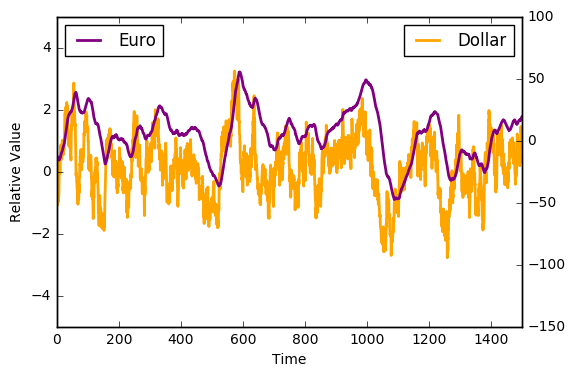

In [5]:
fig8,ax8=plt.subplots()

ax8b=ax8.twinx()

ax8.plot(time_vect[:-1000],Gene[:,0][1000:],color='orange',linewidth=2,label='Dollar')
ax8b.plot(time_vect[:-1000],Gene[:,1][1000:],color='purple',linewidth=2,label='Euro')
ax8.legend(loc=1)
ax8b.legend(loc=2)
ax8.set_xlim([0,1500])
ax8.set_xlabel('Time')
ax8.set_ylabel('Relative Value')
fig8

In [5]:
import numpy as np
t_end = 200000

t_int = 0



N = 400000
dt = float(t_end - t_int) / N
time_vect= np.arange(t_int, t_end, dt)

x_vect=np.linspace(-t_end,t_end,2*len(time_vect))
tau_x=5.0/np.log(2)
tau_y=30.0/np.log(2)
analytic_xcor_XY(x_vect,tau_x,tau_y,1.0)

NameError: name 'tau_x' is not defined